# WITH PANDAS AND MATPLOTLIB

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


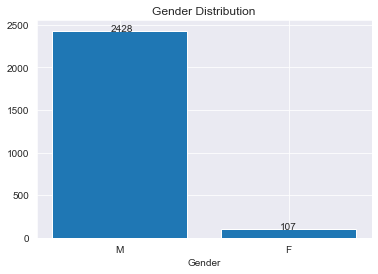

In [4]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+0.15));


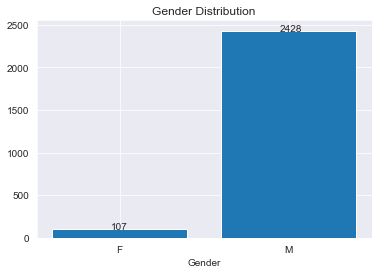

In [5]:
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index[::-1],kill.gender.value_counts().values[::-1])
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+0.15));


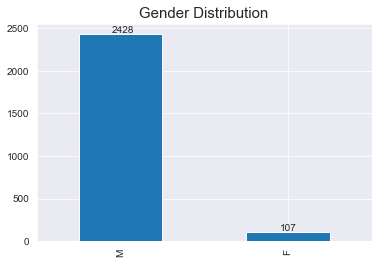

In [6]:
fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')
ax.set_title("Gender Distribution", fontsize=15)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));


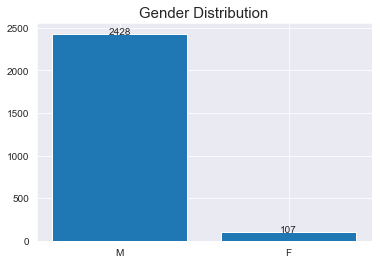

In [7]:
# with matplotlib
bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})
plt.text(x=0, y = bars[0], s = bars[0], ha="center")
plt.text(x=1, y = bars[1], s = bars[1], ha="center")
plt.show()

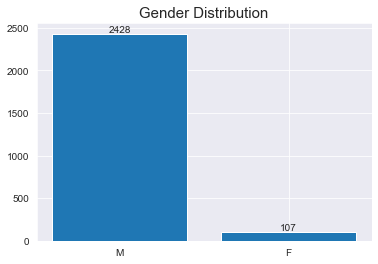

In [8]:
# with matplotlib
bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})

for i in range(len(bars)):
    plt.text(x=i, y=bars[i]+20, s=bars[i], ha='center', size=10)
plt.show()

## 2: Plot 7 most common kill weapons

In [9]:
a = kill.armed.value_counts().head(7)
a

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

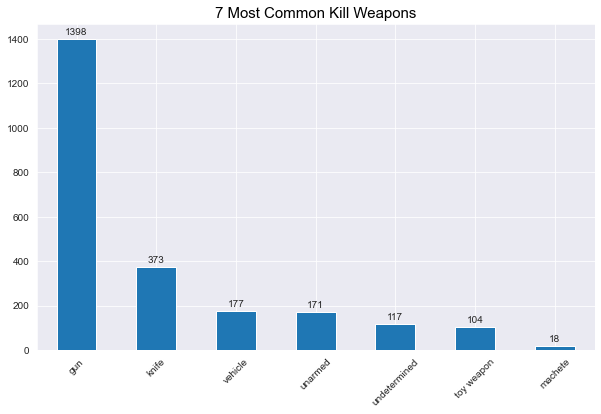

In [10]:
# with matplotlib
plt.figure(figsize=(10, 6))
a.plot(kind="bar")
plt.title("7 Most Common Kill Weapons",color = "k", fontsize = 15)

for i in range(len(a)):
    plt.text(x=i, y=a[i]+20, s=a[i], ha='center', size=10)

plt.xticks(rotation =45)
plt.show()

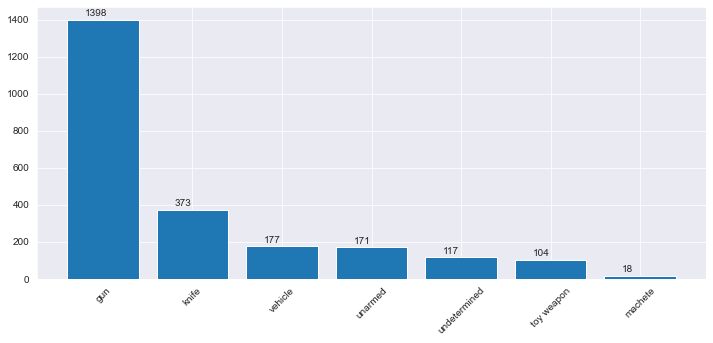

In [11]:
fig ,ax = plt.subplots(figsize=(12,5))
ax.bar(x=a.index,height = a.values)
ax.set_xticklabels(a.index, rotation = 45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));


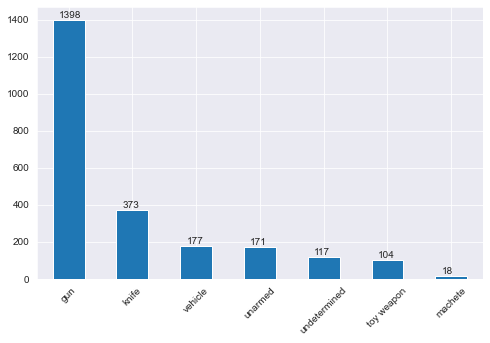

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
a.plot(kind='bar',ax=ax)
ax.set_xticklabels(a.index, rotation=45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [13]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
kill["age_cat"] = kill["age"].apply(lambda x : "above25" if x > 25 else "below25")


In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [16]:
b = kill["age_cat"].value_counts()
b

above25    1905
below25     630
Name: age_cat, dtype: int64

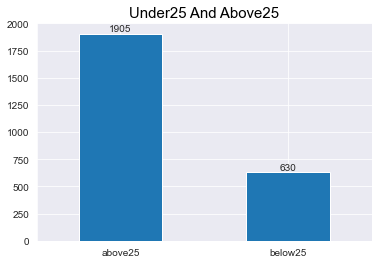

In [17]:
# with matplotlib
b.plot(kind="bar")
plt.title("Under25 And Above25",color = "k", fontsize = 15)

for i in range(len(b)):
    plt.text(x=i, y=b[i]+20, s=b[i], ha='center', size=10)

plt.xticks(rotation =0)
plt.show()

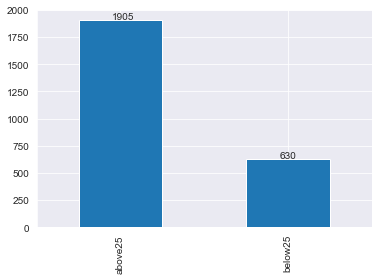

In [18]:
ax = b.plot.bar()
for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));


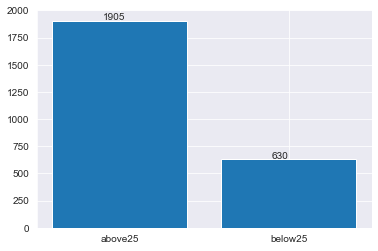

In [19]:
fig,ax = plt.subplots()
ax.bar(b.index, height=b.values)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+10));  # MY FAVORİTE CODE .d.d.d.d


## 4: Plot number of killed poeple by race

In [20]:
c = kill["race"].value_counts()
c

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

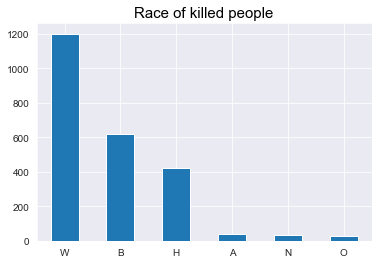

In [21]:
# with matplotlib
c.plot.bar()
plt.title("Race of killed people", color = "k", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

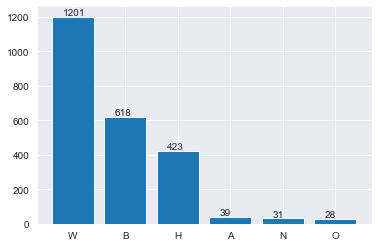

In [22]:
fig,ax = plt.subplots()
ax.bar(c.index, height=c.values)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+10));

## 5: Killed People According to Races (Pie Chart)

In [23]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [24]:
np.array(kill["race"].value_counts().index)

array(['W', 'B', 'H', 'A', 'N', 'O'], dtype=object)

In [25]:
kill["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [26]:
kill.dropna(inplace=True)

In [27]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [28]:
d = kill["race"].value_counts()
d

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [29]:
X = d.index
X

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [30]:
d.values

array([1168,  592,  401,   36,   29,   28])

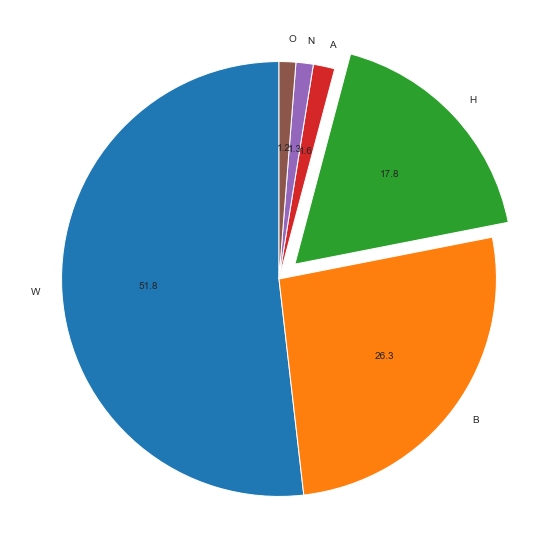

In [31]:
# matplotlib
e = (0,0,0.1,0,0,0)
plt.figure(figsize = (12,10))
plt.pie(d, labels = X, explode = e, autopct="%.1f", startangle=90)

plt.show()

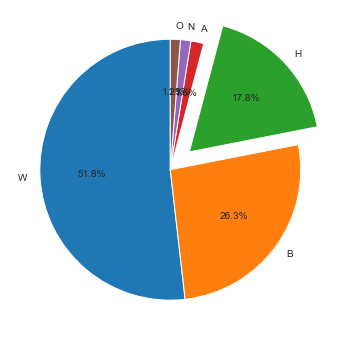

In [32]:
fig,ax=plt.subplots(figsize=(10,6))
explode=(0,0,0.2,0,0,0)
ax.pie(x=d.values,
      explode=explode,
      labels= X,
      autopct="%.1f%%",
       startangle=90);

## 6: Most common 15 Name or Surname of killed people


In [33]:
Name = kill["name"].value_counts().head(15)
Name

Michael Johnson             2
Eric Harris                 2
Daquan Antonio Westbrook    2
Brandon Jones               2
Michael Brown               2
Darnell Wicker              1
James Quealy                1
Jawari Porter               1
Earl Pinckney               1
James W. Jennings           1
Tim Elliot                  1
Michael McClurg             1
Jamarion Rashad Robinson    1
Juan J. Godines             1
Ronald Smith                1
Name: name, dtype: int64

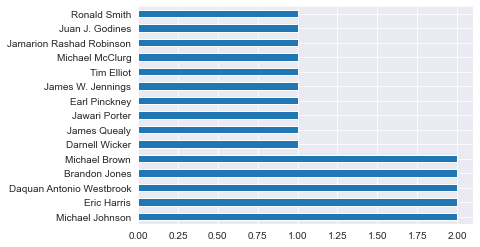

In [34]:
Name.head(15).plot.barh();
